In [2]:
#TASK1
#Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.shape

(1436, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [6]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

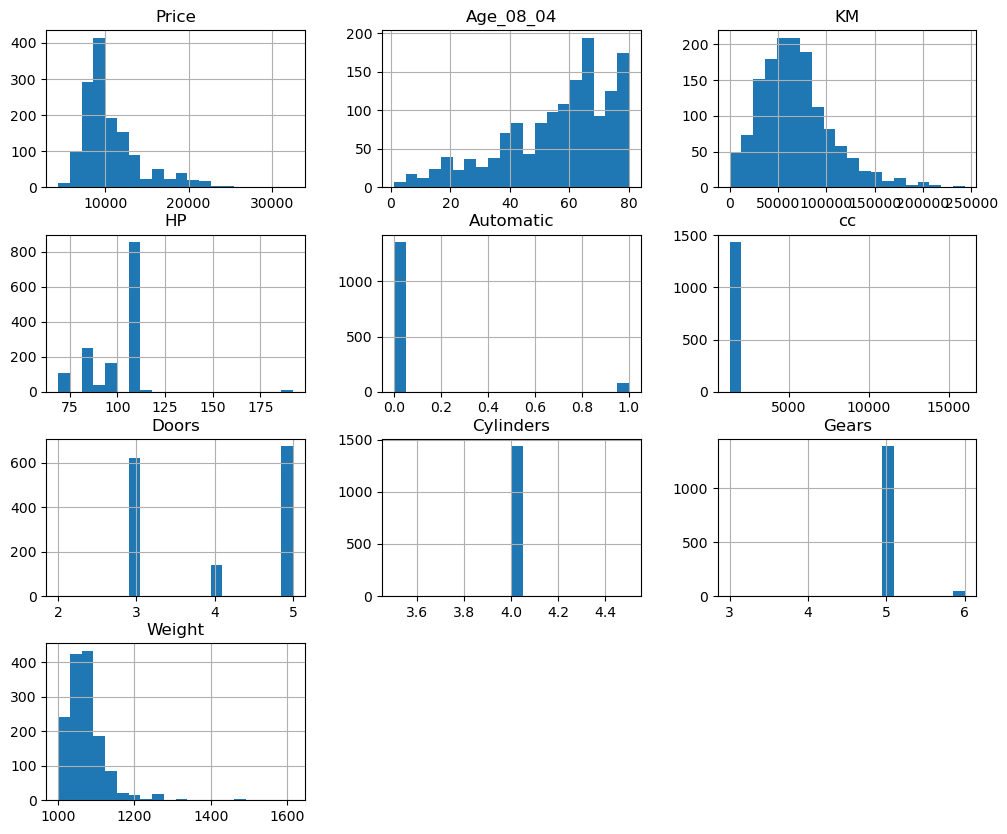

In [7]:
df.hist(bins=20, figsize=(12, 10))
plt.show()

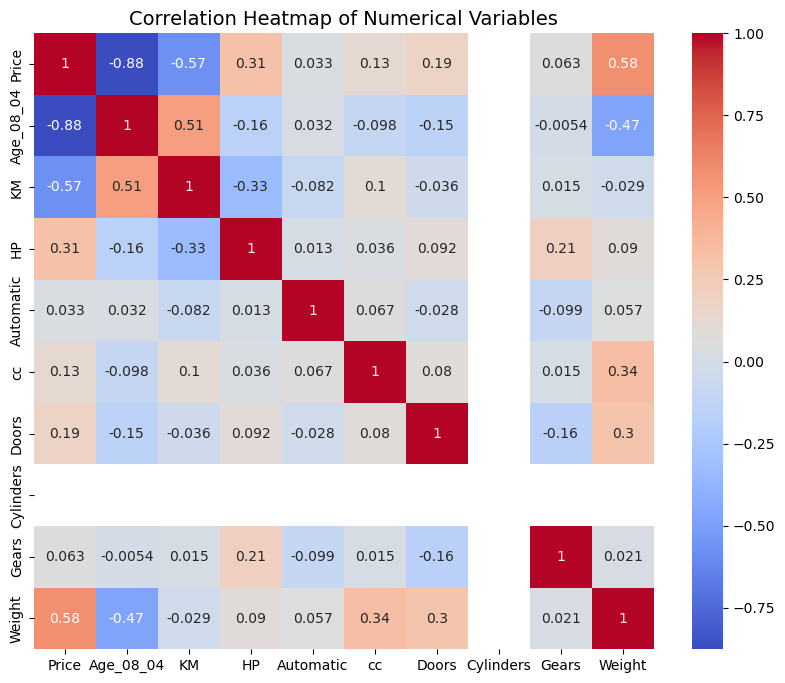

In [9]:
# --- Correlation Heatmap (FIXED: only numeric columns) ---
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Variables", fontsize=14)
plt.show()

In [10]:
# Task 2: Train-Test split
# ------------------------------------
from sklearn.model_selection import train_test_split
# --- One-Hot Encode Categorical Variable (Fuel_Type) ---
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# --- Define Features (X) and Target (y) ---
X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]

# --- Train-Test Split (80% train, 20% test) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Shapes of splits ---
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# --- Show first few rows of training data ---
print("\n--- X_train Sample ---")
print(X_train.head())

Training Features Shape: (1148, 11)
Testing Features Shape: (288, 11)
Training Labels Shape: (1148,)
Testing Labels Shape: (288,)

--- X_train Sample ---
      Age_08_04      KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
899          62   59295   86          0  1300      5          4      5   
881          68   61568  110          0  1600      4          4      5   
310          40   38653  110          0  1600      5          4      5   
1145         75  101855  110          0  1600      5          4      5   
31           22   35199   97          0  1400      3          4      5   

      Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
899     1035             False              True  
881     1035             False              True  
310     1080             False              True  
1145    1070             False              True  
31      1100             False              True  


In [12]:
#Task 3: Build multiple linear regression models 
from sklearn.linear_model import LinearRegression

# --- Model 1: All Features ---
model1 = LinearRegression()
model1.fit(X_train, y_train)

print("\n--- Model 1: All Features ---")
print("R² Score (Train):", model1.score(X_train, y_train))
print("R² Score (Test):", model1.score(X_test, y_test))

# Coefficients
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model1.coef_
})
print(coefficients.sort_values(by="Coefficient", ascending=False))


--- Model 1: All Features ---
R² Score (Train): 0.8702643169608926
R² Score (Test): 0.8348888040611082
             Feature   Coefficient
10  Fuel_Type_Petrol  1.370809e+03
7              Gears  5.516007e+02
3          Automatic  1.488309e+02
8             Weight  2.588496e+01
2                 HP  1.403948e+01
6          Cylinders -1.108447e-12
1                 KM -1.623141e-02
4                 cc -3.037219e-02
5              Doors -6.031097e+01
9   Fuel_Type_Diesel -6.854876e+01
0          Age_08_04 -1.208305e+02


In [13]:
# --- Model 2: Only Strong Predictors (Age, KM, HP, Weight) ---
features2 = ["Age_08_04", "KM", "HP", "Weight"]
model2 = LinearRegression()
model2.fit(X_train[features2], y_train)

print("\n--- Model 2: Selected Features ---")
print("R² Score (Train):", model2.score(X_train[features2], y_train))
print("R² Score (Test):", model2.score(X_test[features2], y_test))

coeff2 = pd.DataFrame({
    "Feature": features2,
    "Coefficient": model2.coef_
})
print(coeff2)



--- Model 2: Selected Features ---
R² Score (Train): 0.8642843529878648
R² Score (Test): 0.8506068681500581
     Feature  Coefficient
0  Age_08_04  -120.025405
1         KM    -0.020233
2         HP    29.052170
3     Weight    19.769066


In [14]:
# --- Model 3: Add Fuel Type Dummies as well ---
features3 = ["Age_08_04", "KM", "HP", "Weight", 
             "Fuel_Type_Diesel", "Fuel_Type_Petrol"]
model3 = LinearRegression()
model3.fit(X_train[features3], y_train)

print("\n--- Model 3: Selected + Fuel Type ---")
print("R² Score (Train):", model3.score(X_train[features3], y_train))
print("R² Score (Test):", model3.score(X_test[features3], y_test))

coeff3 = pd.DataFrame({
    "Feature": features3,
    "Coefficient": model3.coef_
})
print(coeff3)


--- Model 3: Selected + Fuel Type ---
R² Score (Train): 0.8689544647004945
R² Score (Test): 0.8339087377576148
            Feature  Coefficient
0         Age_08_04  -120.665034
1                KM    -0.016237
2                HP    16.258363
3            Weight    25.257766
4  Fuel_Type_Diesel    54.190978
5  Fuel_Type_Petrol  1419.662714


In [15]:
# Task 4: Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics
    print(f"\n--- {model_name} ---")
    print("Train R²:", r2_score(y_train, y_pred_train))
    print("Test R² :", r2_score(y_test, y_pred_test))
    print("MAE      :", mean_absolute_error(y_test, y_pred_test))
    print("MSE      :", mean_squared_error(y_test, y_pred_test))
    print("RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

# --- Evaluate All Models ---
evaluate_model(model1, X_train, X_test, y_train, y_test, "Model 1 (All Features)")
evaluate_model(model2, X_train[features2], X_test[features2], y_train, y_test, "Model 2 (Key Predictors)")
evaluate_model(model3, X_train[features3], X_test[features3], y_train, y_test, "Model 3 (Key Predictors + Fuel Type)")



--- Model 1 (All Features) ---
Train R²: 0.8702643169608926
Test R² : 0.8348888040611082
MAE      : 990.8872739193923
MSE      : 2203043.8231437025
RMSE     : 1484.2654153296514

--- Model 2 (Key Predictors) ---
Train R²: 0.8642843529878648
Test R² : 0.8506068681500581
MAE      : 1001.2017466053624
MSE      : 1993321.0129730718
RMSE     : 1411.8502091132302

--- Model 3 (Key Predictors + Fuel Type) ---
Train R²: 0.8689544647004945
Test R² : 0.8339087377576148
MAE      : 1001.27696800871
MSE      : 2216120.6408840436
RMSE     : 1488.6640456745247


In [16]:
# Task 5: Ridge and Lasso methods 
from sklearn.linear_model import Lasso, Ridge
# --- Ridge Regression ---
ridge = Ridge(alpha=1.0)   # alpha = regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\n--- Ridge Regression ---")
print("Test R²:", r2_score(y_test, y_pred_ridge))
print("MAE    :", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE   :", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

# --- Lasso Regression ---
lasso = Lasso(alpha=0.01)   # small alpha to avoid underfitting
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\n--- Lasso Regression ---")
print("Test R²:", r2_score(y_test, y_pred_lasso))
print("MAE    :", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE   :", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


--- Ridge Regression ---
Test R²: 0.8351359377712344
MAE    : 990.7338342026009
RMSE   : 1483.1541963778845

--- Lasso Regression ---
Test R²: 0.8348946076447359
MAE    : 990.8879478176818
RMSE   : 1484.2393294724482


In [17]:
#INTERVIEW QUESTIONS

In [19]:
1.#Normalization-Changing the values of your data so that they all fit into a small, specific range i.e,0 to 1.
#Standardization-Changing the values so they have a mean = 0 and standard deviation = 1.
#Helpful for:
#Fair Comparison of Features
#Faster & Better Training
#Improves Accuracy of Distance-Based Models
#Makes Data Easier to Interpret

1.0

In [ ]:
#When two or more independent variables (predictors) in a regression model are highly correlated, they give similar information.
#Techniques to handle multicollinearity:
#Remove one of the correlated variables
#Combine correlated variables
#Principal Component Analysis (PCA)
#Regularization methods